GCN based node classification of the protein-protein interaction networks from the "Predicting Multicellular Function through Multi-layer Tissue Networks" paper, containing positional gene sets, motif gene sets and immunological signatures as features (50 in total) and gene ontology sets as labels (121 in total).

/home/junaid/anaconda3/envs/torch_env/lib/python3.10/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch: 0, Train Loss: 0.6939, Val Loss: 0.6906, Val Accuracy: 69.2444
Epoch: 1, Train Loss: 0.6908, Val Loss: 0.6877, Val Accuracy: 75.1607
Epoch: 2, Train Loss: 0.6877, Val Loss: 0.6846, Val Accuracy: 78.7327
Epoch: 3, Train Loss: 0.6845, Val Loss: 0.6812, Val Accuracy: 81.6134
Epoch: 4, Train Loss: 0.6810, Val Loss: 0.6774, Val Accuracy: 83.5425
Epoch: 5, Train Loss: 0.6771, Val Loss: 0.6731, Val Accuracy: 85.5589
Epoch: 6, Train Loss: 0.6728, Val Loss: 0.6683, Val Accuracy: 87.7789
Epoch: 7, Train Loss: 0.6680, Val Loss: 0.6630, Val Accuracy: 88.7662
Epoch: 8, Train Loss: 0.6627, Val Loss: 0.6572, Val Accuracy: 89.1937
Epoch: 9, Train Loss: 0.6569, Val Loss: 0.6509, Val Accuracy: 89.5041
Epoch: 10, Train Loss: 0.6508, Val Loss: 0.6443, Val Accuracy: 90.0396
Epoch: 11, Train Loss: 0.6444, Val Loss: 0.6374, Val Accuracy: 90.3585
Epoch: 12, Train Loss: 0.6378, Val Loss: 0.6304, Val Accuracy: 90.3588
Epoch: 13, Train Loss: 0.6312, Val Loss: 0.6234, Val Accuracy: 90.3440
Epoch: 14, Train

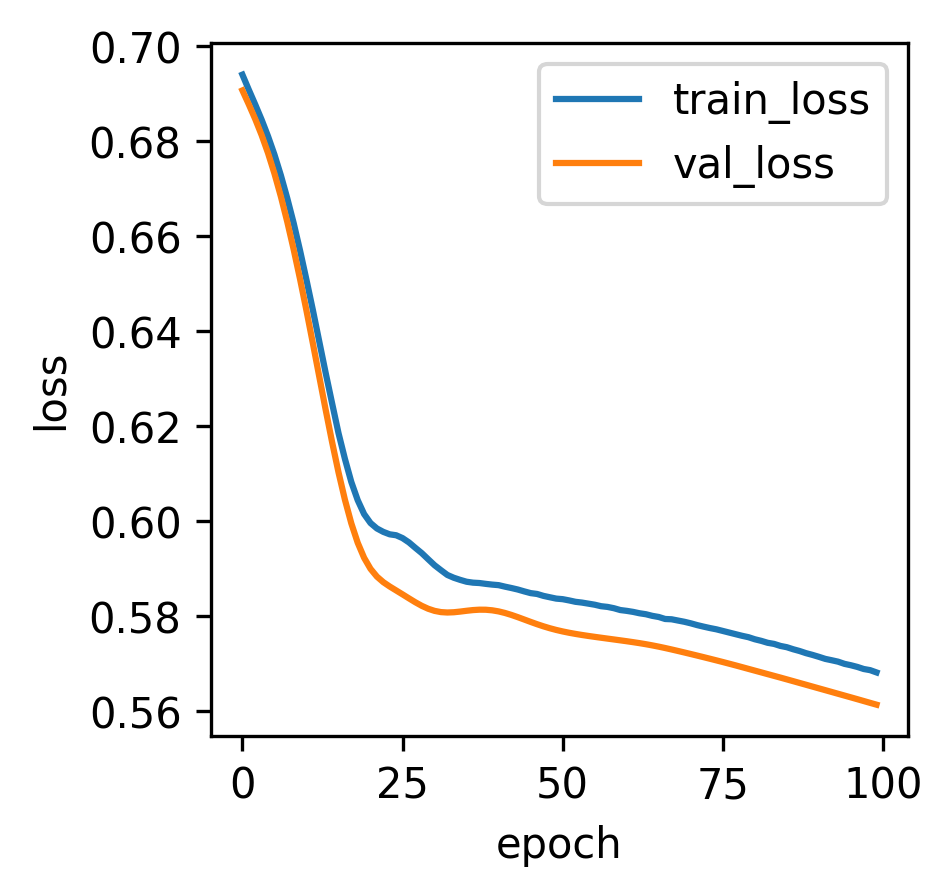

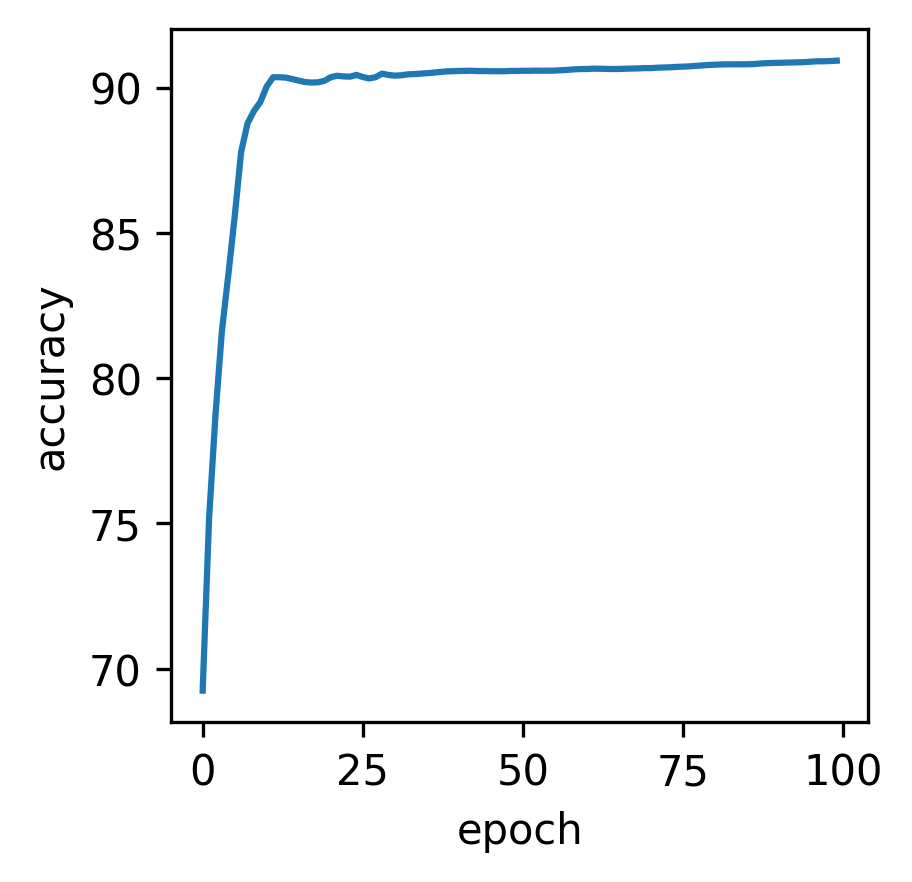

In [10]:
import torch
import torch.nn.functional as F
from torch_geometric.datasets import PPI
from torch_geometric.data import DataLoader

EPOCHS = 100
def load_ppi_data():
    train_dataset = PPI(root='./data/PPI', split='train')
    val_dataset = PPI(root='./data/PPI', split='val')
    test_dataset = PPI(root='./data/PPI', split='test')

    train_loader = DataLoader(train_dataset, batch_size=100, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=100, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=100, shuffle=False)

    return train_loader, val_loader, test_loader

train_loader, val_loader, test_loader = load_ppi_data()


from torch_geometric.nn import GCNConv

class PPI_GCN(torch.nn.Module):
    def __init__(self, num_features, num_classes):
        super(PPI_GCN, self).__init__()
        self.conv1 = GCNConv(num_features, 256)
        self.conv2 = GCNConv(256, 256)
        self.conv3 = GCNConv(256, num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, p=0.5, training=self.training)
        x = F.relu(self.conv2(x, edge_index))
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv3(x, edge_index)

        return x


def train(model, train_loader, optimizer):
    model.train()
    total_loss = 0
    for data in train_loader:
        optimizer.zero_grad()
        data = data.to(device)
        out = model(data)
        loss = F.binary_cross_entropy_with_logits(out, data.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * data.num_graphs
    return total_loss / len(train_loader.dataset)



device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = PPI_GCN(train_loader.dataset.num_features, train_loader.dataset.num_classes).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


def eval_model(model, loader):
    model.eval()

    total_loss = 0
    total_correct = 0
    total_examples = 0

    for data in loader:
        with torch.no_grad():
            out = model(data.to(device))
            loss = F.binary_cross_entropy_with_logits(out, data.y.to(device))
            total_loss += loss.item() * data.num_graphs

            pred = (out > 0).float() * 1
            correct = pred.eq(data.y.to(device)).sum().item()
            total_correct += correct
            total_examples += data.num_nodes

    return total_loss / len(loader.dataset), total_correct / total_examples

# Train and evaluate the model

train_losser=[]
val_losser=[]
val_accuracyer=[]

for epoch in range(EPOCHS):
    train_loss = train(model, train_loader, optimizer)
    val_loss, val_accuracy = eval_model(model, val_loader)
    print(f'Epoch: {epoch}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')
    train_losser.append(train_loss)
    val_losser.append(val_loss)
    val_accuracyer.append(val_accuracy)


import matplotlib.pyplot as plt
plt.figure(figsize=(3,3),dpi=300)
plt.plot(train_losser)
plt.plot(val_losser)
plt.legend(['train_loss','val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


plt.figure(figsize=(3,3),dpi=300)
plt.plot(val_accuracyer)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()





GAT based node classification of the protein-protein interaction networks from the "Predicting Multicellular Function through Multi-layer Tissue Networks" paper, containing positional gene sets, motif gene sets and immunological signatures as features (50 in total) and gene ontology sets as labels (121 in total).

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
/home/junaid/anaconda3/envs/torch_env/lib/python3.10/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch: 0, Train Loss: 0.6139, Val Loss: 0.5510, Val Accuracy: 89.6108
Epoch: 1, Train Loss: 0.5661, Val Loss: 0.5461, Val Accuracy: 90.4767
Epoch: 2, Train Loss: 0.5610, Val Loss: 0.5413, Val Accuracy: 90.5548
Epoch: 3, Train Loss: 0.5529, Val Loss: 0.5372, Val Accuracy: 90.7515
Epoch: 4, Train Loss: 0.5455, Val Loss: 0.5309, Val Accuracy: 90.8262
Epoch: 5, Train Loss: 0.5377, Val Loss: 0.5455, Val Accuracy: 89.2501
Epoch: 6, Train Loss: 0.5352, Val Loss: 0.5267, Val Accuracy: 90.8930
Epoch: 7, Train Loss: 0.5302, Val Loss: 0.5302, Val Accuracy: 90.0786
Epoch: 8, Train Loss: 0.5286, Val Loss: 0.5290, Val Accuracy: 90.2820
Epoch: 9, Train Loss: 0.5281, Val Loss: 0.5267, Val Accuracy: 90.6319
Epoch: 10, Train Loss: 0.5256, Val Loss: 0.5313, Val Accuracy: 89.7576
Epoch: 11, Train Loss: 0.5229, Val Loss: 0.5614, Val Accuracy: 86.2849
Epoch: 12, Train Loss: 0.5232, Val Loss: 0.5490, Val Accuracy: 87.8457
Epoch: 13, Train Loss: 0.5254, Val Loss: 0.5473, Val Accuracy: 88.0933
Epoch: 14, Train

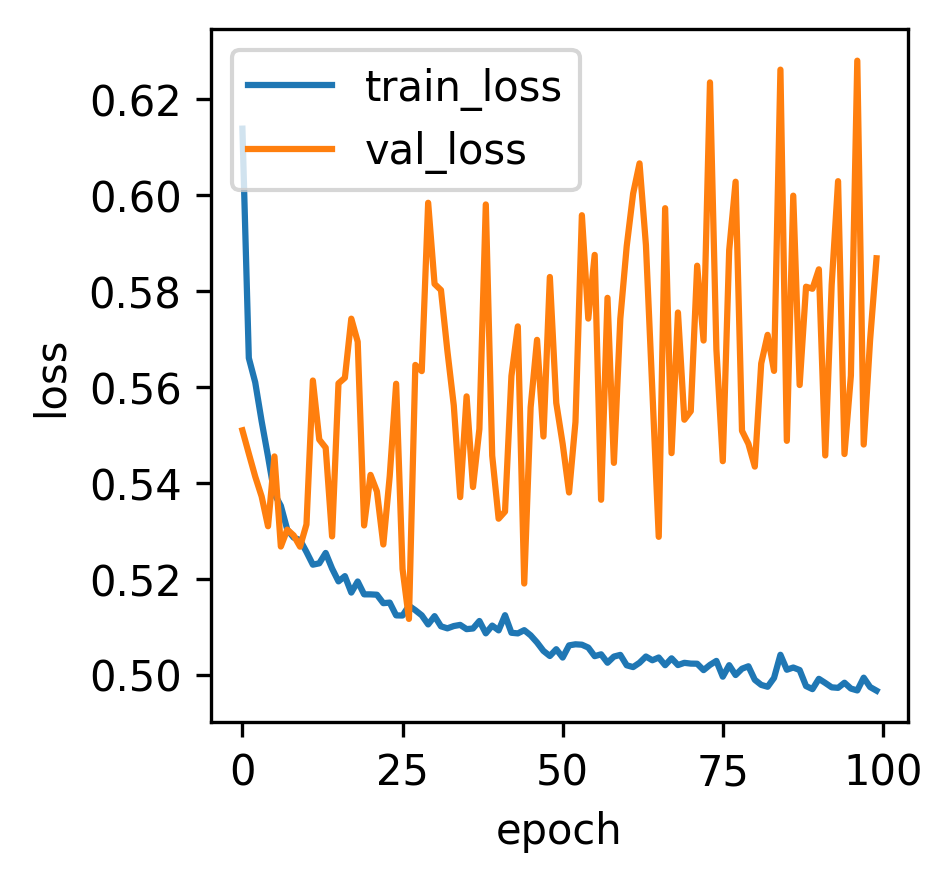

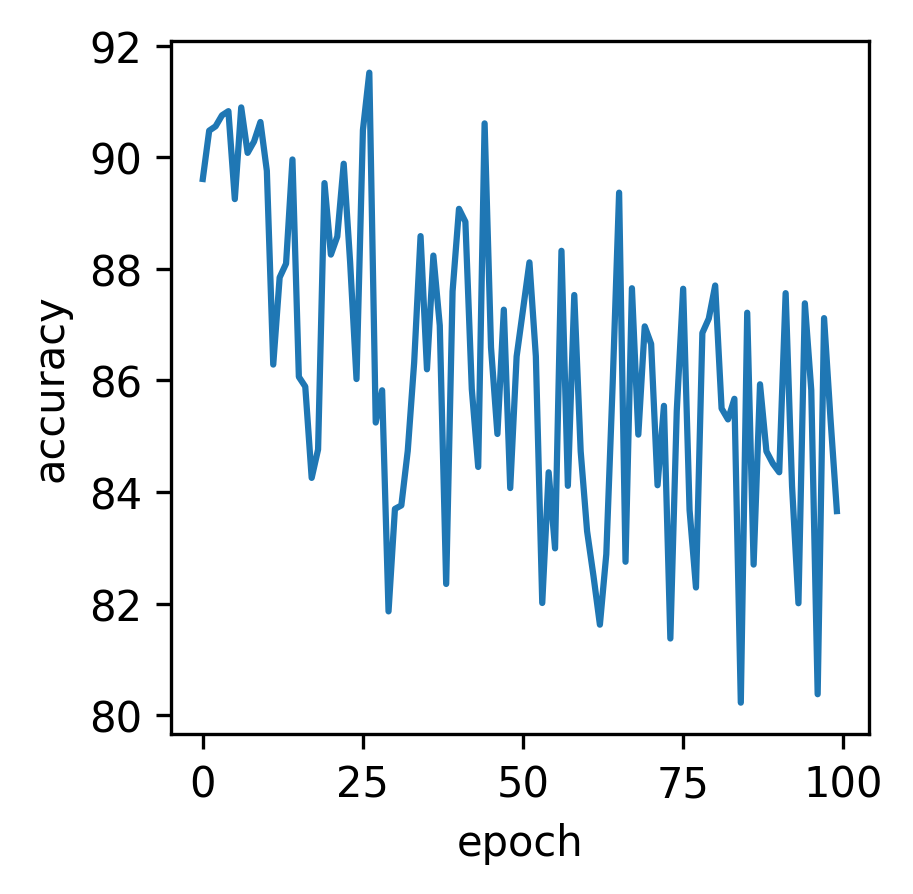

In [1]:
import torch
import torch.nn.functional as F
from torch_geometric.datasets import PPI
from torch_geometric.data import DataLoader

EPOCHS = 100
def load_ppi_data():
    train_dataset = PPI(root='./data/PPI', split='train')
    val_dataset = PPI(root='./data/PPI', split='val')
    test_dataset = PPI(root='./data/PPI', split='test')

    train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=2, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=2, shuffle=False)

    return train_loader, val_loader, test_loader

train_loader, val_loader, test_loader = load_ppi_data()


from torch_geometric.nn import GATConv

class PPI_GAT(torch.nn.Module):
    def __init__(self, num_features, num_classes):
        super(PPI_GAT, self).__init__()
        self.conv1 = GATConv(num_features, 256, heads=4, concat=True, dropout=0.6)
        self.conv2 = GATConv(256 * 4, 256, heads=4, concat=True, dropout=0.6)
        self.conv3 = GATConv(256 * 4, num_classes, heads=6, concat=False, dropout=0.6)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.elu(self.conv1(x, edge_index))
        x = F.dropout(x, p=0.6, training=self.training)
        x = F.elu(self.conv2(x, edge_index))
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv3(x, edge_index)
        

        return x


def train(model, train_loader, optimizer):
    model.train()
    total_loss = 0
    for data in train_loader:
        optimizer.zero_grad()
        data = data.to(device)
        out = model(data)
        loss = F.binary_cross_entropy_with_logits(out, data.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * data.num_graphs
    return total_loss / len(train_loader.dataset)



device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = PPI_GAT(train_loader.dataset.num_features, train_loader.dataset.num_classes).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)



def eval_model(model, loader):
    model.eval()

    total_loss = 0
    total_correct = 0
    total_examples = 0

    for data in loader:
        with torch.no_grad():
            out = model(data.to(device))
            loss = F.binary_cross_entropy_with_logits(out, data.y.to(device))
            total_loss += loss.item() * data.num_graphs

            pred = (out > 0).float() * 1
            correct = pred.eq(data.y.to(device)).sum().item()
            total_correct += correct
            total_examples += data.num_nodes

    return total_loss / len(loader.dataset), total_correct / total_examples

# Train and evaluate the model

train_losser=[]
val_losser=[]
val_accuracyer=[]

for epoch in range(EPOCHS):
    train_loss = train(model, train_loader, optimizer)
    val_loss, val_accuracy = eval_model(model, val_loader)
    print(f'Epoch: {epoch}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')
    train_losser.append(train_loss)
    val_losser.append(val_loss)
    val_accuracyer.append(val_accuracy)


import matplotlib.pyplot as plt
plt.figure(figsize=(3,3),dpi=300)
plt.plot(train_losser)
plt.plot(val_losser)
plt.legend(['train_loss','val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


plt.figure(figsize=(3,3),dpi=300)
plt.plot(val_accuracyer)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()



